In [1]:
import pandas as pd
import matplotlib.pyplot as plt # plotting data
import seaborn as sns
import numpy as np

## Importando os dados

In [2]:
df = pd.read_csv('cs_bisnode_panel.csv')

In [3]:
df.shape #total de linhas, total de colunas

(287829, 48)

In [4]:
#Quantas linhas e colunas (variáveis) estão contidas no dataset?
# identificar o volume de dados do DataFrame: 
# shape[0] = #registros
# shape[1] = #variáveis

print("# Registros:\t{}".format(df.shape[0]))
print("# Variáveis:\t{}\n".format(df.shape[1])) 

#Quais os tipos das variáveis?
display(df.dtypes)

# Registros:	287829
# Variáveis:	48



comp_id                 float64
begin                    object
end                      object
COGS                    float64
amort                   float64
curr_assets             float64
curr_liab               float64
extra_exp               float64
extra_inc               float64
extra_profit_loss       float64
finished_prod           float64
fixed_assets            float64
inc_bef_tax             float64
intang_assets           float64
inventories             float64
liq_assets              float64
material_exp            float64
net_dom_sales           float64
net_exp_sales           float64
personnel_exp           float64
profit_loss_year        float64
sales                   float64
share_eq                float64
subscribed_cap          float64
tang_assets             float64
wages                   float64
D                       float64
balsheet_flag             int64
balsheet_length           int64
balsheet_notfullyear      int64
year                      int64
founded_

<br>

## Excluindo e transformando as colunas

In [5]:
## excluir colunas 
df = df.drop(['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

In [6]:
#Visualiza as 5 primeiras linhas do dataset 
df.head()

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,1229.629639,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,725.925903,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,1322.222168,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,1022.222229,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,814.814819,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [7]:
#Qual a porcentagem de valores ausentes/faltantes no dataset (missings)?
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

exit_year               0.864993
exit_date               0.804815
labor_avg               0.509094
birth_year              0.388488
founded_year            0.196148
gender                  0.196043
origin                  0.196043
female                  0.196043
foreign                 0.196043
ceo_count               0.196043
inoffice_days           0.196043
extra_exp               0.064375
extra_inc               0.064375
extra_profit_loss       0.059768
profit_loss_year        0.034340
ind                     0.033940
material_exp            0.027933
personnel_exp           0.027933
amort                   0.027933
sales                   0.025838
inc_bef_tax             0.025838
tang_assets             0.005107
ind2                    0.003606
nace_main               0.003606
region_m                0.002918
intang_assets           0.000486
subscribed_cap          0.000455
share_eq                0.000455
liq_assets              0.000455
inventories             0.000455
fixed_asse

<AxesSubplot:>

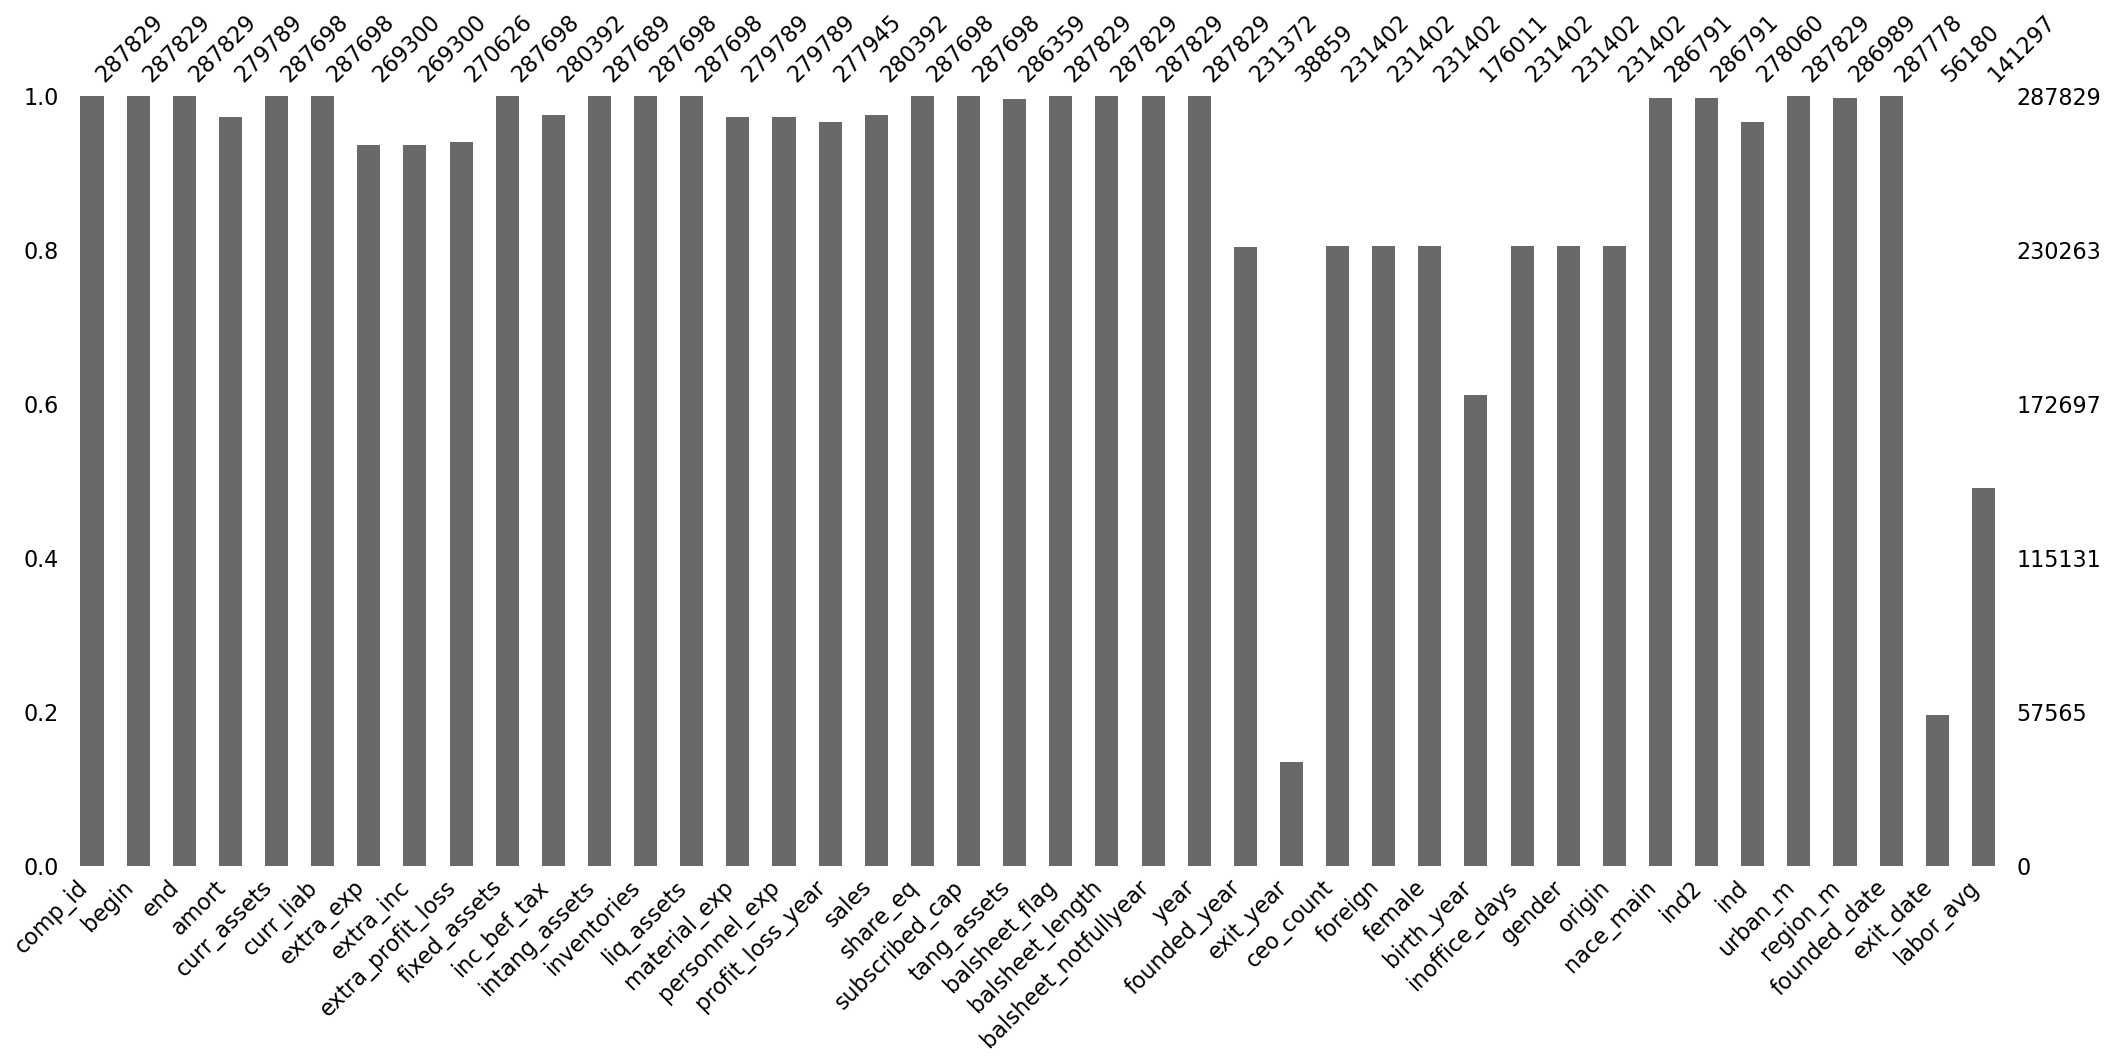

In [8]:
## !pip install missingno
import missingno as msno
msno.bar(df) #check percentual de missing de features

In [9]:
#Qual a porcentagem de valores ausentes/faltantes no dataset (missings)?
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

exit_year               0.864993
exit_date               0.804815
labor_avg               0.509094
birth_year              0.388488
founded_year            0.196148
gender                  0.196043
origin                  0.196043
female                  0.196043
foreign                 0.196043
ceo_count               0.196043
inoffice_days           0.196043
extra_exp               0.064375
extra_inc               0.064375
extra_profit_loss       0.059768
profit_loss_year        0.034340
ind                     0.033940
material_exp            0.027933
personnel_exp           0.027933
amort                   0.027933
sales                   0.025838
inc_bef_tax             0.025838
tang_assets             0.005107
ind2                    0.003606
nace_main               0.003606
region_m                0.002918
intang_assets           0.000486
subscribed_cap          0.000455
share_eq                0.000455
liq_assets              0.000455
inventories             0.000455
fixed_asse

In [10]:
print(df.columns)

Index(['comp_id', 'begin', 'end', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'fixed_assets',
       'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets',
       'material_exp', 'personnel_exp', 'profit_loss_year', 'sales',
       'share_eq', 'subscribed_cap', 'tang_assets', 'balsheet_flag',
       'balsheet_length', 'balsheet_notfullyear', 'year', 'founded_year',
       'exit_year', 'ceo_count', 'foreign', 'female', 'birth_year',
       'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind',
       'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg'],
      dtype='object')


<br>

### Tudo que não estiver vinculado ao ano 2016, irá filtrar e armazenar o resultado de volta no DataFrame

In [11]:
df = df.query('year != 2016')

#### Outras transformações

In [12]:
df['founded_date'] = pd.to_datetime(df['founded_date']) #converte a coluna 'founded_date' para datetime (era object)
df = df[df['founded_date'] >= '2012-01-01'] # filtra as linhas que a coluna 'founded_date' é maior ou igual a '2012-01-01'

In [13]:
#Quantas linhas e colunas (variáveis) estão contidas no dataset?
# identificar o volume de dados do DataFrame: 
# shape[0] = #registros
# shape[1] = #variáveis

print("# Registros:\t{}".format(df.shape[0]))
print("# Variáveis:\t{}\n".format(df.shape[1])) 

#Quais os tipos das variáveis?
display(df.dtypes)

# Registros:	19983
# Variáveis:	42



comp_id                        float64
begin                           object
end                             object
amort                          float64
curr_assets                    float64
curr_liab                      float64
extra_exp                      float64
extra_inc                      float64
extra_profit_loss              float64
fixed_assets                   float64
inc_bef_tax                    float64
intang_assets                  float64
inventories                    float64
liq_assets                     float64
material_exp                   float64
personnel_exp                  float64
profit_loss_year               float64
sales                          float64
share_eq                       float64
subscribed_cap                 float64
tang_assets                    float64
balsheet_flag                    int64
balsheet_length                  int64
balsheet_notfullyear             int64
year                             int64
founded_year             

<br>

### Se na coluna 'sales' conter valores negativos, converter em 0

In [15]:
df['sales'] = df['sales'].apply(lambda x: x if x >= 0 else 0)

In [16]:
df.describe() #dados gerais do seu df

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,...,ceo_count,foreign,female,birth_year,inoffice_days,nace_main,ind2,ind,urban_m,labor_avg
count,1.998300e+04,1.960400e+04,1.998000e+04,1.998000e+04,1.963100e+04,1.963100e+04,1.963200e+04,1.998000e+04,1.963200e+04,1.998000e+04,...,15884.000000,15884.000000,15884.000000,14290.000000,15884.000000,19925.000000,19925.000000,19596.000000,19983.000000,11374.000000
mean,1.563599e+11,2.634134e+03,5.066470e+04,4.879523e+04,5.956486e+02,1.372033e+03,7.772829e+02,9.439236e+04,-2.714027e+03,3.184668e+04,...,1.136993,0.124669,0.291509,1972.641748,1140.416583,5227.187051,52.072321,2.834099,2.024121,0.415681
std,1.390753e+11,2.294132e+04,1.017101e+06,6.481946e+05,4.378059e+04,1.001087e+05,9.169987e+04,2.855195e+06,1.695177e+05,2.053676e+06,...,0.375030,0.323942,0.440538,11.473429,419.780030,961.225536,9.663877,0.414440,0.861503,1.479921
min,1.004898e+06,-1.788790e+03,-6.411111e+03,-3.807407e+03,-8.129629e+03,-1.470000e+04,-1.761033e+06,0.000000e+00,-9.377751e+06,-5.555556e+01,...,1.000000,0.000000,0.000000,1920.000000,10.000000,111.000000,1.000000,1.000000,1.000000,0.000000
25%,2.906498e+10,0.000000e+00,1.851852e+03,6.148148e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.156482e+03,0.000000e+00,...,1.000000,0.000000,0.000000,1966.000000,836.750000,5590.000000,55.000000,3.000000,1.000000,0.090278
50%,1.194312e+11,2.222222e+02,6.277778e+03,5.107407e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.592592e+02,-4.851852e+02,0.000000e+00,...,1.000000,0.000000,0.000000,1974.000000,1173.000000,5610.000000,56.000000,3.000000,2.000000,0.194444
75%,2.647123e+11,1.229630e+03,1.533056e+04,2.013796e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.450000e+03,7.629630e+02,0.000000e+00,...,1.000000,0.000000,1.000000,1981.000000,1486.000000,5610.000000,56.000000,3.000000,3.000000,0.402778
max,4.639265e+11,1.328109e+06,9.091082e+07,5.128913e+07,5.555556e+06,1.268413e+07,1.268413e+07,1.647772e+08,1.446630e+07,1.594445e+08,...,4.000000,1.000000,1.000000,2014.000000,1819.000000,9604.000000,96.000000,3.000000,3.000000,114.500000


<br>

<br>

## Correlação entre as Variáveis

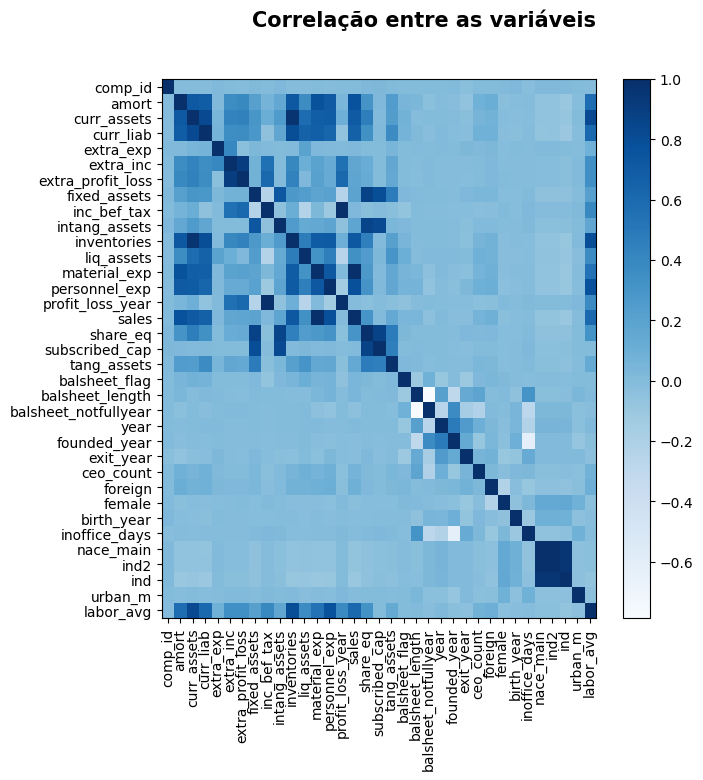

In [18]:
#Qual a correlação existente entre as variáveis?
corr = df.corr()

# Mostra a matriz
plt.figure(figsize=(7, 7))
# imshow é usado para mostrar imagens
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
# mostra a barra lateral de cores
plt.colorbar()
# inclui o nome das variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre as variáveis', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

# mostrar a matriz de correlação
#display(corr)


<AxesSubplot:>

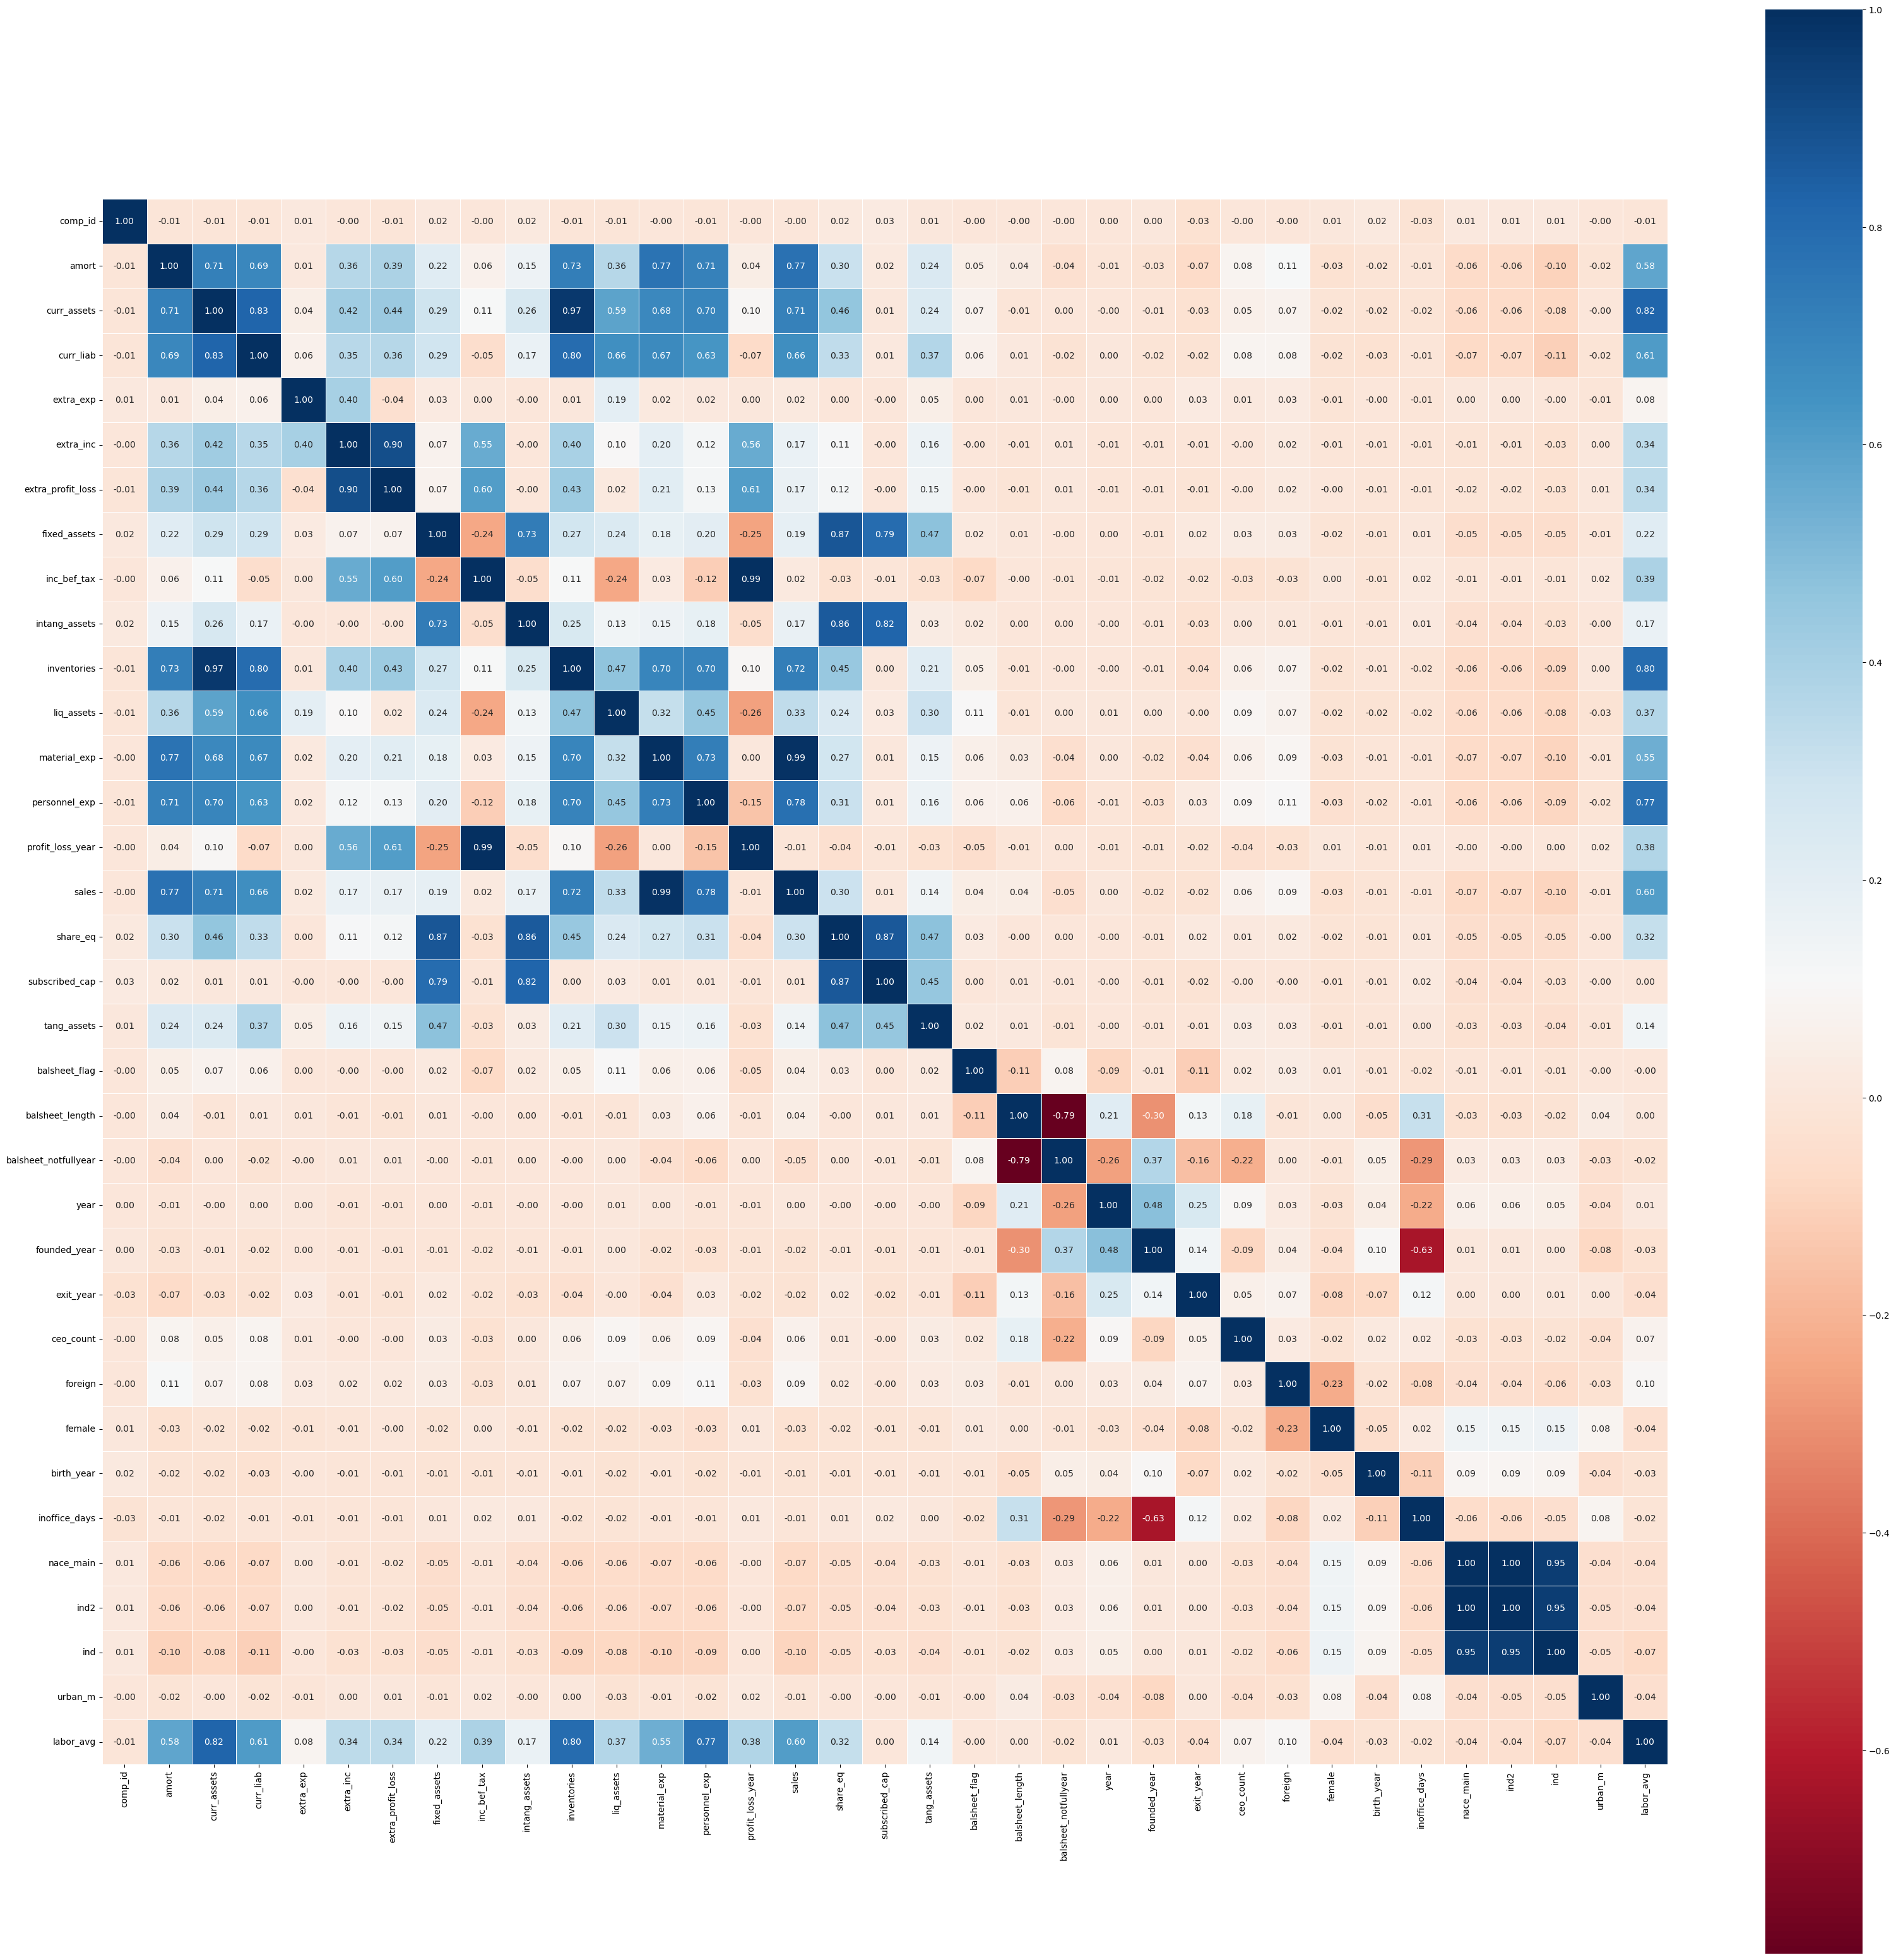

In [19]:
# plotar um heatmap a partir das correlações
fig, ax = plt.subplots(figsize=(40,40))         # Sample figsize in inches
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, linewidths=.5, ax=ax)

In [20]:
#Assim, para identificarmos as variáveis correlacionadas, usamos um laço for:

p = 0.75 # correlação mínima
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

#Com isso, podemos remover as variáveis mais correlacionadas de modo a reduzir a redundância nos dados.

Variáveis mais correlacionadas:
 [['amort', 'material_exp'], ['amort', 'sales'], ['curr_assets', 'curr_liab'], ['curr_assets', 'inventories'], ['curr_assets', 'labor_avg'], ['curr_liab', 'curr_assets'], ['curr_liab', 'inventories'], ['extra_inc', 'extra_profit_loss'], ['extra_profit_loss', 'extra_inc'], ['fixed_assets', 'share_eq'], ['fixed_assets', 'subscribed_cap'], ['inc_bef_tax', 'profit_loss_year'], ['intang_assets', 'share_eq'], ['intang_assets', 'subscribed_cap'], ['inventories', 'curr_assets'], ['inventories', 'curr_liab'], ['inventories', 'labor_avg'], ['material_exp', 'amort'], ['material_exp', 'sales'], ['personnel_exp', 'sales'], ['personnel_exp', 'labor_avg'], ['profit_loss_year', 'inc_bef_tax'], ['sales', 'amort'], ['sales', 'material_exp'], ['sales', 'personnel_exp'], ['share_eq', 'fixed_assets'], ['share_eq', 'intang_assets'], ['share_eq', 'subscribed_cap'], ['subscribed_cap', 'fixed_assets'], ['subscribed_cap', 'intang_assets'], ['subscribed_cap', 'share_eq'], ['balshe

In [21]:
# visualizando em tabela os resultados de coeficiente
df_corr = df.copy()
df_corr = pd.DataFrame(var, columns=['Var 1', 'Var 2'])
df_corr['Coeficiente de correlacao'] = [np.abs(corr.loc[df_corr.loc[i,'Var 1'], df_corr.loc[i,'Var 2']]) for i in df_corr.index]
df_corr = df_corr.sort_values(by='Coeficiente de correlacao', ascending=False).reset_index(drop=True)

# Display novo dataframe 
print(df_corr.to_string(index=False))

               Var 1                Var 2  Coeficiente de correlacao
                ind2            nace_main                   0.999834
           nace_main                 ind2                   0.999834
         inc_bef_tax     profit_loss_year                   0.993618
    profit_loss_year          inc_bef_tax                   0.993618
        material_exp                sales                   0.991032
               sales         material_exp                   0.991032
         inventories          curr_assets                   0.970547
         curr_assets          inventories                   0.970547
                 ind            nace_main                   0.952073
           nace_main                  ind                   0.952073
                ind2                  ind                   0.951652
                 ind                 ind2                   0.951652
           extra_inc    extra_profit_loss                   0.899453
   extra_profit_loss            ex

### Novo dataframe para armazenar esse novo df `df_corr` e não impactar o nosso original

In [22]:
df_corr

# visualização dos coeficientes ordenados pelo grau de correlação

,Var 1,Var 2,Coeficiente de correlacao
0,ind2,nace_main,0.999834
1,nace_main,ind2,0.999834
2,inc_bef_tax,profit_loss_year,0.993618
3,profit_loss_year,inc_bef_tax,0.993618
4,material_exp,sales,0.991032
5,sales,material_exp,0.991032
6,inventories,curr_assets,0.970547
7,curr_assets,inventories,0.970547
8,ind,nace_main,0.952073
9,nace_main,ind,0.952073


In [23]:
display(df.dtypes)

comp_id                        float64
begin                           object
end                             object
amort                          float64
curr_assets                    float64
curr_liab                      float64
extra_exp                      float64
extra_inc                      float64
extra_profit_loss              float64
fixed_assets                   float64
inc_bef_tax                    float64
intang_assets                  float64
inventories                    float64
liq_assets                     float64
material_exp                   float64
personnel_exp                  float64
profit_loss_year               float64
sales                          float64
share_eq                       float64
subscribed_cap                 float64
tang_assets                    float64
balsheet_flag                    int64
balsheet_length                  int64
balsheet_notfullyear             int64
year                             int64
founded_year             

In [24]:
df ['idade da empresa'] = df['year'] - df['founded_year']
df ['tempo de vida'] = df['exit_year'] - df['founded_year']
df

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,idade da empresa,tempo de vida
44,1.004898e+06,2015-05-22,2015-12-31,2214.814697,16325.925781,5892.592773,0.0,0.0,0.0,13177.777344,...,5610.0,56.0,3.0,1,Central,2015-05-20,NaN,0.083333,0.0,NaN
106,1.039649e+06,2015-06-15,2015-12-31,0.000000,5755.555664,37.037037,0.0,0.0,0.0,0.000000,...,5610.0,56.0,3.0,1,Central,2015-06-09,NaN,NaN,0.0,NaN
192,1.142600e+06,2015-01-20,2015-12-31,17600.000000,101481.476562,186525.921875,0.0,0.0,0.0,22911.111328,...,5610.0,56.0,3.0,1,Central,2015-01-19,NaN,1.166667,0.0,NaN
197,1.157633e+06,2015-06-04,2015-12-31,137.037033,61329.628906,34192.593750,0.0,0.0,0.0,2962.962891,...,3320.0,33.0,2.0,1,Central,2015-05-26,NaN,0.083333,0.0,NaN
261,1.303257e+06,2013-03-04,2013-12-31,0.000000,1855.555542,1362.963013,0.0,0.0,0.0,0.000000,...,5630.0,56.0,3.0,3,East,2013-02-28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287733,4.638292e+11,2012-07-05,2012-12-31,37.037037,1537.036987,3788.888916,0.0,0.0,0.0,340.740753,...,5630.0,56.0,3.0,3,Central,2012-07-04,NaN,0.166667,NaN,NaN
287734,4.638292e+11,2013-01-01,2013-12-31,74.074074,444.444458,4837.037109,0.0,0.0,0.0,266.666656,...,5630.0,56.0,3.0,3,Central,2012-07-04,NaN,NaN,1.0,NaN
287735,4.638292e+11,2014-01-01,2014-12-31,74.074074,440.740753,4837.037109,0.0,0.0,0.0,192.592590,...,5630.0,56.0,3.0,3,Central,2012-07-04,NaN,NaN,2.0,NaN
287736,4.638292e+11,2015-01-01,2015-12-31,74.074074,440.740753,4837.037109,0.0,0.0,0.0,118.518517,...,5630.0,56.0,3.0,3,Central,2012-07-04,NaN,NaN,3.0,NaN


In [25]:
display(df.dtypes)

comp_id                        float64
begin                           object
end                             object
amort                          float64
curr_assets                    float64
curr_liab                      float64
extra_exp                      float64
extra_inc                      float64
extra_profit_loss              float64
fixed_assets                   float64
inc_bef_tax                    float64
intang_assets                  float64
inventories                    float64
liq_assets                     float64
material_exp                   float64
personnel_exp                  float64
profit_loss_year               float64
sales                          float64
share_eq                       float64
subscribed_cap                 float64
tang_assets                    float64
balsheet_flag                    int64
balsheet_length                  int64
balsheet_notfullyear             int64
year                             int64
founded_year             

### Tabela Sumarizada

In [ ]:
tab_matriz = df.groupby('gender').agg({'extra_inc':'mean',
                                  'extra_exp': 'mean',
                                  'extra_profit_loss':'mean',
                                  'curr_assets':'mean',
                                  'sales':'sum'})
tab_matriz = tab_matriz.sort_values(by='sales', ascending=False)
tab_matriz

<br>

## Plotando os dados

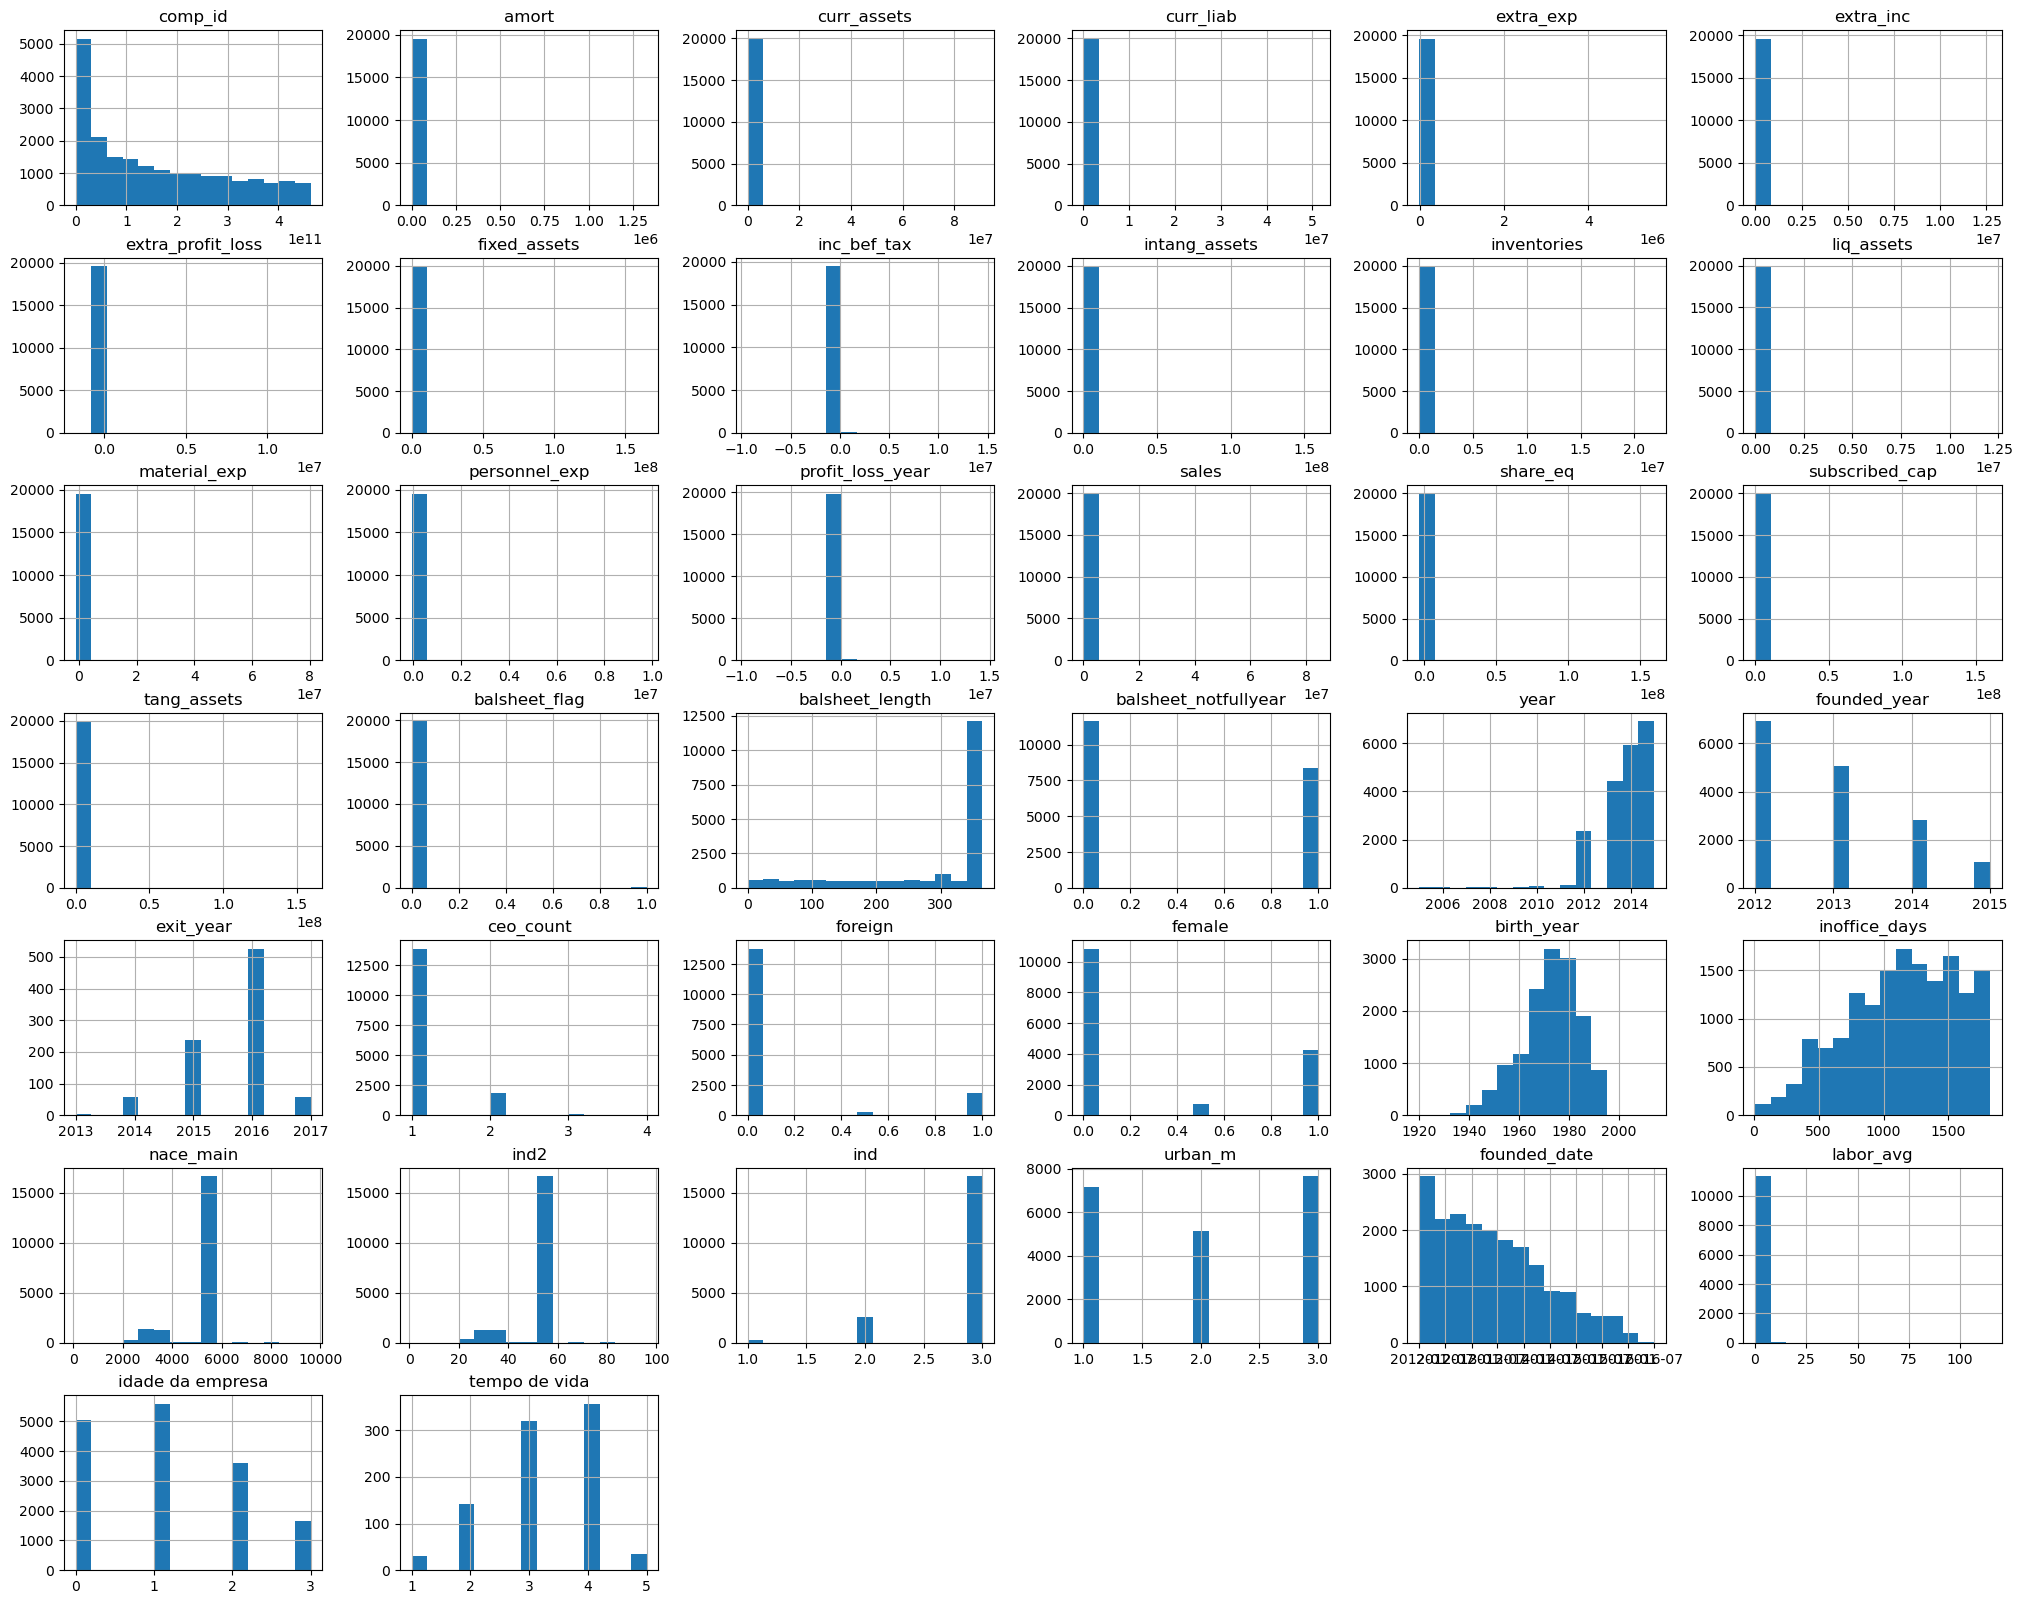

In [26]:
# plotar o histograma das variáveis numéricas e melhor entendimento dos dados trabalhados

df.hist(bins=15, figsize=(25,20));

In [ ]:
#plot 1

sns.pairplot(df)

In [ ]:
#plot 2

sns.pairplot(df)
sns.scatterplot(x='inc_bef_tax', y='profit_loss_year', hue='region_m', data=df)
plt.show()

In [ ]:
#plot 3

df.plot(x='year', y='sales')

In [ ]:
# plot 4

sns.set()
for region, sales in df.groupby('region_m')['sales']:
    plt.plot(sales, label=region)
plt.legend(ncol=2, loc='upper left')

plt.show()

<br>

## Exportar dataframe

In [ ]:
df.to_csv(r'C:\Users\Jeffs\Documents\Coding\my_data.csv', index=False)